# Yelp API - Lab


## Introduction 

Now that we've seen how the Yelp API works and some basic Folium visualizations, it's time to put those skills to work in order to create a working map! Taking things a step further, you'll also independently explore how to perform pagination in order to retrieve a full results set from the Yelp API!

## Objectives

You will be able to: 
* Create HTTP requests to get data from Yelp API
* Parse HTTP responses and perform data analysis on the data returned
* Perform pagination to retrieve troves of data!
* Create a simple geographical system to view information about selected businesses, at a given location. 

## Problem Introduction

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retrieving 50 at a time. Processes such as these are often referred to as pagination.

In this lab, you will define a search and then paginate over the results to retrieve all of the results. You'll then parse these responses as a DataFrame (for further exploration) and create a map using Folium to visualize the results geographically.

## Part I - Make the Initial Request

Start by making an initial request to the Yelp API. Your search must include at least 2 parameters: **term** and **location**. For example, you might search for pizza restaurants in NYC. The term and location is up to you but make the request below.

In [1]:
# Your code here
import json

def get_api(path):
    with open(path) as f:
        return json.load(f)

In [2]:
import requests

In [3]:
key = get_api("/Users/Lucas/.secret/API/yelp_api.json")
api_key = key['api_key']

In [4]:
term = "Taco"
location = "Greenpoint"
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = { 'Authorization': 'Bearer {}'.format(api_key),}
url_params = {
    'term':term.replace(" ","+"),
    'location':location.replace(" ","+"),
    'limit': 50
}

In [5]:
response = requests.get(url, headers = headers, params = url_params)
print(response)
print(type(response.text))

<Response [200]>
<class 'str'>


## Pagination

Now that you have an initial response, you can examine the contents of the JSON container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

**Note: be mindful of the API rate limits. You can only make 5000 requests per day and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

In [6]:
# Your code here; use a function or loop to retrieve all the results from your original request

import pandas as pd 
import time

def yelp_request(url_params, api_key):
    
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = { 'Authorization': 'Bearer {}'.format(api_key),}
    
    response = requests.get(url, headers = headers, params = url_params)
    df = pd.DataFrame(response.json()['businesses'])
    return df

def concat_requests(url_params, api_key):
    num = response.json()['total']
    count = 0
    dfs = []
    while count<num and count<1000:
        url_params['offset']=count
        dfs.append(yelp_request(url_params,api_key))
        time.sleep(1)
        count += 50
    df = pd.concat(dfs, ignore_index = True)
    return df

df = concat_requests(url_params, api_key)
print(len(df))
df.head()

1000


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,good-move-brooklyn,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...","{'latitude': 40.7253043200226, 'longitude': -7...",(718) 383-6038,432.134325,HrrJ1OdstzLJCC5JQrHWGA,https://s3-media4.fl.yelpcdn.com/bphoto/AGtNMt...,False,"{'address1': '167 Nassau Ave', 'address2': '',...",Good Move,+17183836038,$$,4.0,30,"[delivery, pickup]",https://www.yelp.com/biz/good-move-brooklyn?ad...
1,oxomoco-brooklyn-2,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.7299099, 'longitude': -73.95548}",(646) 688-4180,797.751920,vyKBwzRdNX4yiJDIFv37iw,https://s3-media1.fl.yelpcdn.com/bphoto/F2A0uM...,False,"{'address1': '128 Greenpoint Ave', 'address2':...",Oxomoco,+16466884180,$$$,4.0,246,[],https://www.yelp.com/biz/oxomoco-brooklyn-2?ad...
2,tacovision-new-york,"[{'alias': 'tacos', 'title': 'Tacos'}]","{'latitude': 40.7568200311153, 'longitude': -7...",(646) 921-1990,3582.440008,4UxmxAqehEIh7fYrzUEA7A,https://s3-media3.fl.yelpcdn.com/bphoto/gnq7KL...,False,"{'address1': '244 E 53rd St', 'address2': '', ...",Tacovision,+16469211990,NaN,4.5,33,"[delivery, pickup]",https://www.yelp.com/biz/tacovision-new-york?a...
3,tacombi-williamsburg-new-york-2,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.71489, 'longitude': -73.95949}",(718) 599-3496,1951.688048,M6XZ8IIOGmBfh79vk79Eqw,https://s3-media2.fl.yelpcdn.com/bphoto/C2ZbqY...,False,"{'address1': '242 Metropolitan Ave', 'address2...",Tacombi - Williamsburg,+17185993496,NaN,5.0,6,[],https://www.yelp.com/biz/tacombi-williamsburg-...
4,taqueria-la-nortena-brooklyn-8,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.72474, 'longitude': -73.95121}",(718) 349-2626,651.978262,6k6PRNSLnExNes-iGcu1EA,https://s3-media2.fl.yelpcdn.com/bphoto/V9B9lO...,False,"{'address1': '668 Manhattan Ave', 'address2': ...",Taqueria La Nortena,+17183492626,$,3.5,115,"[delivery, pickup]",https://www.yelp.com/biz/taqueria-la-nortena-b...


## Exploratory Analysis

Take the restaurants from the previous question and do an initial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

In [7]:
df.loc[df['name'] == 'Oxomoco']

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
1,oxomoco-brooklyn-2,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.7299099, 'longitude': -73.95548}",(646) 688-4180,797.75192,vyKBwzRdNX4yiJDIFv37iw,https://s3-media1.fl.yelpcdn.com/bphoto/F2A0uM...,False,"{'address1': '128 Greenpoint Ave', 'address2':...",Oxomoco,+16466884180,$$$,4.0,246,[],https://www.yelp.com/biz/oxomoco-brooklyn-2?ad...


In [8]:
df['distance']<4000

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
970    False
971    False
972     True
973     True
974    False
975     True
976    False
977    False
978     True
979    False
980     True
981     True
982    False
983    False
984     True
985    False
986     True
987     True
988     True
989     True
990    False
991     True
992    False
993    False
994    False
995     True
996    False
997    False
998    False
999     True
Name: distance, Length: 1000, dtype: bool

In [9]:
type(df['distance'][0])

numpy.float64

In [10]:
close_tacos = df[(df['distance']<1000) & (df['rating']>=4)]
close_tacos.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,good-move-brooklyn,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...","{'latitude': 40.7253043200226, 'longitude': -7...",(718) 383-6038,432.134325,HrrJ1OdstzLJCC5JQrHWGA,https://s3-media4.fl.yelpcdn.com/bphoto/AGtNMt...,False,"{'address1': '167 Nassau Ave', 'address2': '',...",Good Move,+17183836038,$$,4.0,30,"[delivery, pickup]",https://www.yelp.com/biz/good-move-brooklyn?ad...
1,oxomoco-brooklyn-2,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.7299099, 'longitude': -73.95548}",(646) 688-4180,797.751920,vyKBwzRdNX4yiJDIFv37iw,https://s3-media1.fl.yelpcdn.com/bphoto/F2A0uM...,False,"{'address1': '128 Greenpoint Ave', 'address2':...",Oxomoco,+16466884180,$$$,4.0,246,[],https://www.yelp.com/biz/oxomoco-brooklyn-2?ad...
5,friducha-brooklyn,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 40.73152, 'longitude': -73.95432}",(718) 383-0026,733.724712,l0ZOGV9tohkpfHiZ-3XSRg,https://s3-media3.fl.yelpcdn.com/bphoto/t9WRQF...,False,"{'address1': '946 Manhattan Ave', 'address2': ...",Friducha,+17183830026,$$,4.0,70,"[delivery, pickup]",https://www.yelp.com/biz/friducha-brooklyn?adj...
6,jimbo-slims-brooklyn,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...","{'latitude': 40.7209450363619, 'longitude': -7...",(917) 909-1057,915.917372,cOUYYcrOeManYPyuun_xVg,https://s3-media3.fl.yelpcdn.com/bphoto/05BSfd...,False,"{'address1': '524 Graham Ave', 'address2': '',...",Jimbo Slims,+19179091057,NaN,5.0,34,[],https://www.yelp.com/biz/jimbo-slims-brooklyn?...
73,the-royal-brooklyn-brooklyn-2,"[{'alias': 'sportsbars', 'title': 'Sports Bars...","{'latitude': 40.734047, 'longitude': -73.955227}",(718) 349-0022,935.063033,Mb0gJe5qmNov4rzJwx3bew,https://s3-media3.fl.yelpcdn.com/bphoto/f8taey...,False,"{'address1': '1025 Manhattan Ave', 'address2':...",The Royal Brooklyn,+17183490022,NaN,5.0,5,"[pickup, delivery]",https://www.yelp.com/biz/the-royal-brooklyn-br...


/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aa175c0>,
      dtype=object)

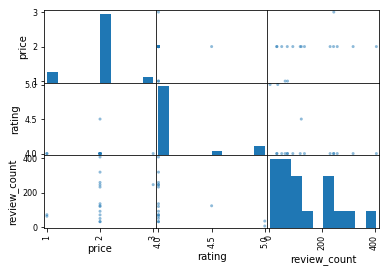

In [11]:
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline

close_tacos.price = df.price.fillna(value=0)
price_dict = {"$": 1, "$$":2, "$$$": 3, "$$$$":4}
close_tacos.price = df.price.map(price_dict)

pd.plotting.scatter_matrix(close_tacos[['price', 'rating', 'review_count']])

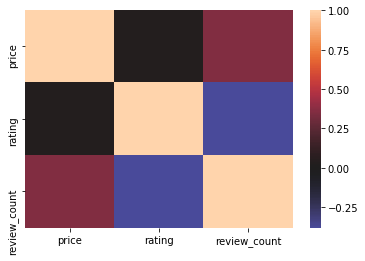

In [12]:
import seaborn as sns
sns.heatmap(close_tacos[['price', 'rating', 'review_count']].corr(), center=0);

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved. Be sure to also add popups to the markers giving some basic information such as name, rating and price.

In [13]:
# Your code here
close_tacos.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,good-move-brooklyn,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...","{'latitude': 40.7253043200226, 'longitude': -7...",(718) 383-6038,432.134325,HrrJ1OdstzLJCC5JQrHWGA,https://s3-media4.fl.yelpcdn.com/bphoto/AGtNMt...,False,"{'address1': '167 Nassau Ave', 'address2': '',...",Good Move,+17183836038,2.0,4.0,30,"[delivery, pickup]",https://www.yelp.com/biz/good-move-brooklyn?ad...
1,oxomoco-brooklyn-2,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.7299099, 'longitude': -73.95548}",(646) 688-4180,797.751920,vyKBwzRdNX4yiJDIFv37iw,https://s3-media1.fl.yelpcdn.com/bphoto/F2A0uM...,False,"{'address1': '128 Greenpoint Ave', 'address2':...",Oxomoco,+16466884180,3.0,4.0,246,[],https://www.yelp.com/biz/oxomoco-brooklyn-2?ad...
5,friducha-brooklyn,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 40.73152, 'longitude': -73.95432}",(718) 383-0026,733.724712,l0ZOGV9tohkpfHiZ-3XSRg,https://s3-media3.fl.yelpcdn.com/bphoto/t9WRQF...,False,"{'address1': '946 Manhattan Ave', 'address2': ...",Friducha,+17183830026,2.0,4.0,70,"[delivery, pickup]",https://www.yelp.com/biz/friducha-brooklyn?adj...
6,jimbo-slims-brooklyn,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...","{'latitude': 40.7209450363619, 'longitude': -7...",(917) 909-1057,915.917372,cOUYYcrOeManYPyuun_xVg,https://s3-media3.fl.yelpcdn.com/bphoto/05BSfd...,False,"{'address1': '524 Graham Ave', 'address2': '',...",Jimbo Slims,+19179091057,NaN,5.0,34,[],https://www.yelp.com/biz/jimbo-slims-brooklyn?...
73,the-royal-brooklyn-brooklyn-2,"[{'alias': 'sportsbars', 'title': 'Sports Bars...","{'latitude': 40.734047, 'longitude': -73.955227}",(718) 349-0022,935.063033,Mb0gJe5qmNov4rzJwx3bew,https://s3-media3.fl.yelpcdn.com/bphoto/f8taey...,False,"{'address1': '1025 Manhattan Ave', 'address2':...",The Royal Brooklyn,+17183490022,NaN,5.0,5,"[pickup, delivery]",https://www.yelp.com/biz/the-royal-brooklyn-br...


In [14]:
len(close_tacos)

18

In [15]:
close_tacos['coordinates'][0]

{'latitude': 40.7253043200226, 'longitude': -73.9465199000016}

In [16]:
lat_long = close_tacos['coordinates'].iloc[0]

In [17]:
lat_long

{'latitude': 40.7253043200226, 'longitude': -73.9465199000016}

In [18]:
lat_long['latitude']
lat = ['latitude']
long = ['longitude']

In [21]:
import sys
sys.setrecursionlimit(50000)

In [26]:
import folium

lat_long = close_tacos['coordinates'].iloc[0]
lat = lat_long['latitude']
long = lat_long['longitude']
base_map = folium.Map([lat, long])


for i in close_tacos.index:
    try:
        lat_long = close_tacos['coordinates'][i]
        lat = lat_long['latitude']
        long = lat_long['longitude']
        name = close_tacos['name'][i]
        rating = close_tacos['rating'][i]
        price = close_tacos['price'][i]
        details = "{}\nPrice: {} Rating:{}".format(name,str(price),str(rating))
        popup = folium.Popup(details, parse_html=True)
        marker = folium.Marker([lat, long], popup=popup)
        marker.add_to(base_map)
    except:
        print('Hit error on row: {}'.format(i))
base_map
  

## Summary

Nice work! In this lab, you synthesized your skills for the day, making multiple API calls to Yelp in order to paginate through a results set, performing some basic exploratory analysis and then creating a nice map visual to display the results! Well done!